In [1]:
#Khởi tạo models 

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow import keras
from tensorflow.keras import layers
#import cv2  # import openCV
#cv2.__version__

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:

train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/fruit/Train',
                        target_size=(120, 120),
                        batch_size=30,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/fruit/Validation",
                         target_size=(120, 120),
                          batch_size=30,
                          
                         class_mode="categorical")
test_dataset = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/fruit/test-fruit",
                         target_size=(120, 120),
                          batch_size=30,
                          
                         class_mode="categorical")
#training_generator=np.array(training_generator)  # tạo mảng


Found 745 images belonging to 10 classes.
Found 154 images belonging to 10 classes.
Found 124 images belonging to 10 classes.


In [6]:
training_generator

In [7]:
training_generator.class_indices

{'Cam': 0,
 'Cà chua': 1,
 'Chuối': 2,
 'Na': 3,
 'Sầu Riêng': 4,
 'Táo': 5,
 'Xoài': 6,
 'bắp': 7,
 'bơ': 8,
 'dứa': 9}

In [ ]:
#data_augmentation = keras.Sequential(
# [
 #   layers.experimental.preprocessing.RandomFlip("horizontal", 
 #                                                input_shape=(img_height, 
 #                                                             img_width,
  #                                                            3)),
#    layers.experimental.preprocessing.RandomRotation(0.1),
 #   layers.experimental.preprocessing.RandomZoom(0.1),
 # ]
#)

In [8]:

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

#model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64,activation='relu',name='fc1'))

model.add(Dense(32,activation='relu',name='fc2'))

model.add(Dense(10,activation='softmax'))

#compiling the model..
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)
#from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#from tensorflow.keras.optimizers import Adam
#opt = Adam(learning_rate=0.001)
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = model.fit(training_generator,batch_size=50,epochs=65,verbose=1,validation_data=validation_generator)


Epoch 1/65
25/25 [==============================] - 262s 10s/step - loss: 2.2452 - accuracy: 0.1584 - val_loss: 2.0799 - val_accuracy: 0.1948
Epoch 2/65
25/25 [==============================] - 5s 190ms/step - loss: 1.8747 - accuracy: 0.2913 - val_loss: 1.6085 - val_accuracy: 0.4351
Epoch 3/65
25/25 [==============================] - 5s 192ms/step - loss: 1.5453 - accuracy: 0.4054 - val_loss: 1.3867 - val_accuracy: 0.4416
Epoch 4/65
25/25 [==============================] - 5s 201ms/step - loss: 1.3677 - accuracy: 0.4765 - val_loss: 1.4362 - val_accuracy: 0.4481
Epoch 5/65
25/25 [==============================] - 5s 188ms/step - loss: 1.2822 - accuracy: 0.5060 - val_loss: 1.1495 - val_accuracy: 0.5714
Epoch 6/65
25/25 [==============================] - 5s 190ms/step - loss: 1.1015 - accuracy: 0.5919 - val_loss: 1.0974 - val_accuracy: 0.5844
Epoch 7/65
25/25 [==============================] - 5s 193ms/step - loss: 1.0030 - accuracy: 0.6228 - val_loss: 1.2788 - val_accuracy: 0.5195
Epoch 

In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_fruit.h5')

In [11]:
score=model.evaluate(test_dataset,verbose=0)
print('Test loss = ',score[0])
print('Test acuracy',score[1])

Test loss =  8.80892276763916
Test acuracy 0.2016129046678543


In [12]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_fruit.h5')

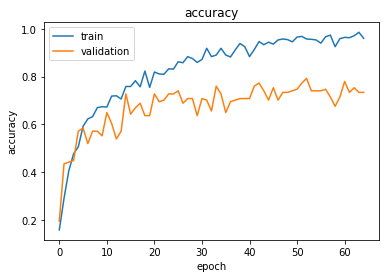

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [14]:
training_generator.class_indices

{'Cam': 0,
 'Cà chua': 1,
 'Chuối': 2,
 'Na': 3,
 'Sầu Riêng': 4,
 'Táo': 5,
 'Xoài': 6,
 'bắp': 7,
 'bơ': 8,
 'dứa': 9}

In [15]:
names= ['Cam','Cà chua','chuối','Na','Sầu Riêng','Táo','Xoài','bắp','bơ','dứa']

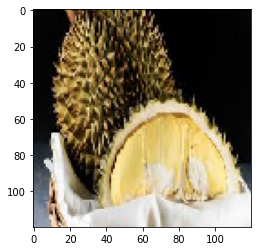

In [21]:
from keras.preprocessing.image import load_img
img=load_img('saurieng1.jpg',target_size=(120,120,3))
plt.imshow(img)

In [22]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,120,120,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

Sầu Riêng


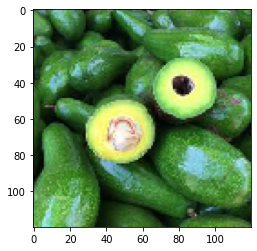

In [31]:
from keras.preprocessing.image import load_img
img=load_img('bo.jpg',target_size=(120,120,3))
plt.imshow(img)

In [32]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,120,120,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

bơ


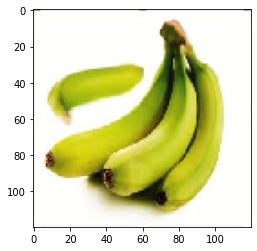

In [39]:
from keras.preprocessing.image import load_img
img=load_img('chuoi.jpg',target_size=(120,120,3))
plt.imshow(img)

In [40]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,120,120,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print(names[np.argmax(model.predict(img))])

chuối


In [ ]:
training_generator.class_indices

{'Cam': 0,
 'Cà chua': 1,
 'Chuối': 2,
 'Na': 3,
 'Sầu Riêng': 4,
 'Táo': 5,
 'Xoài': 6,
 'bắp': 7,
 'bơ': 8,
 'dứa': 9}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CNN_fruit.ipynb')

In [ ]:
data_augmentation=keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",
                                                                                 imput_shape=(img_height,
                                                                                              img_width,3)),
                                    layers.experimental.preprocessing.RandomRotation(0.1),
                                    layers.experimental.preprocessing.RandomZoom(0.1)])